In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Rename the columns name

In [4]:
data.rename(columns=lambda x: x.strip(), inplace=True)


In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
data.rename(columns={
    'Annual Income (k$)':'Annual_income',
    'Spending Score (1-100)':'Spending_Score'
}, inplace=True)

# The columns in the DataFrame 'df' are renamed in place


In [6]:
data

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.drop('CustomerID', axis=1,inplace=True)

In [8]:
data

,Gender,Age,Annual_income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# watching out is there any duplicates rows

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame
duplicates = data[data.duplicated(keep=False)]
duplicates


,Gender,Age,Annual_income,Spending_Score


# Treating outliers

In [10]:
data.describe()

,Age,Annual_income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Age.quantile(0.75)
q1 = data.Age.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(79.375, -1.625)

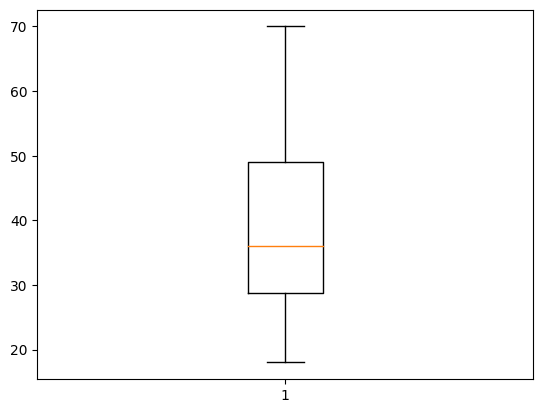

In [12]:
# Creating plot
plt.boxplot(data['Age'])
 
# show plot
plt.show()

In [13]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Annual_income.quantile(0.75)
q1 = data.Annual_income.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(132.75, -13.25)

In [14]:
data['Annual_income'] = data['Annual_income'].clip(upper_tres,lower_tres)

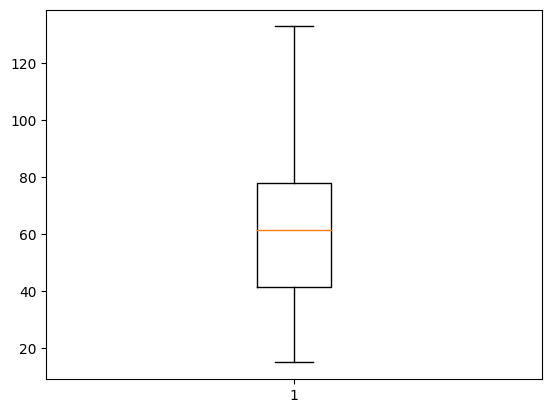

In [15]:
# Creating plot
plt.boxplot(data['Annual_income'])
 
# show plot
plt.show()

In [16]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Spending_Score.quantile(0.75)
q1 = data.Spending_Score.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(130.375, -22.625)

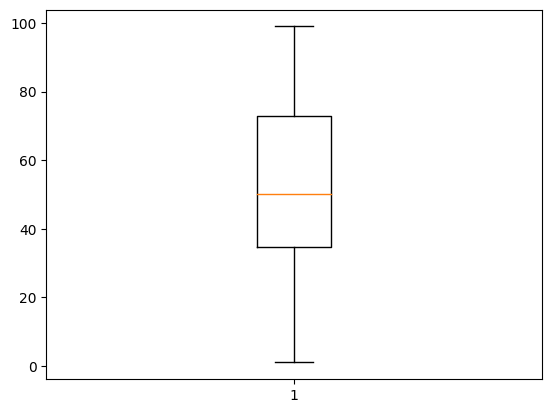

In [17]:
# Creating plot
plt.boxplot(data['Spending_Score'])
 
# show plot
plt.show()

# skewness

<Figure size 800x600 with 0 Axes>

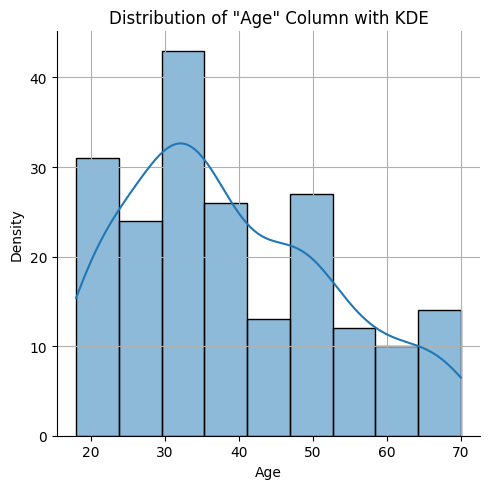

In [18]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of "Age" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
data['Age'].skew()

0.48556885096681657

<Figure size 800x600 with 0 Axes>

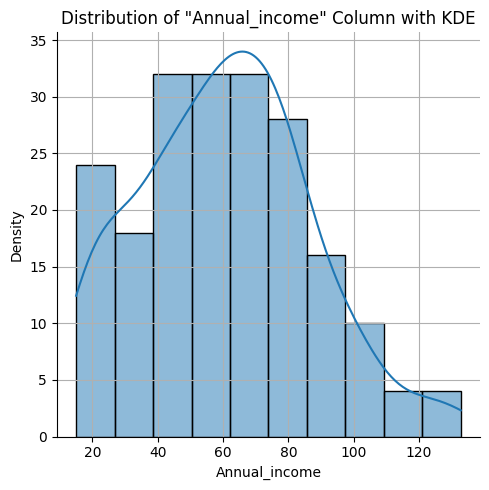

In [20]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Annual_income'], kde=True)
plt.xlabel('Annual_income')
plt.ylabel('Density')
plt.title('Distribution of "Annual_income" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
data['Annual_income'].skew()

0.29124893139168184

<Figure size 800x600 with 0 Axes>

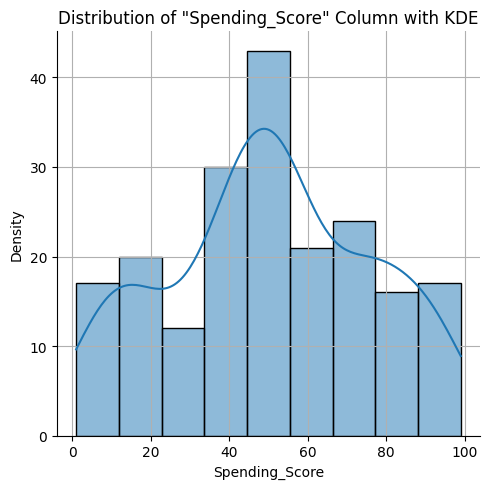

In [22]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Spending_Score'], kde=True)
plt.xlabel('Spending_Score')
plt.ylabel('Density')
plt.title('Distribution of "Spending_Score" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# EDA

In [23]:
data

,Gender,Age,Annual_income,Spending_Score
0,Male,19,15.00,39
1,Male,21,15.00,81
2,Female,20,16.00,6
3,Female,23,16.00,77
4,Female,31,17.00,40
...,...,...,...,...
195,Female,35,120.00,79
196,Female,45,126.00,28
197,Male,32,126.00,74
198,Male,32,132.75,18


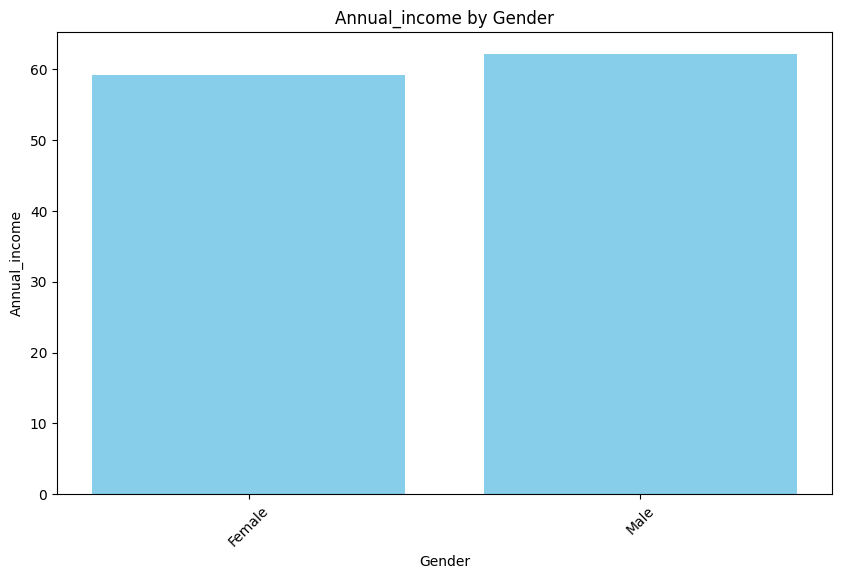

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Gender')['Annual_income'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Gender'], grouped_data['Annual_income'], color='skyblue')
plt.title("Annual_income by Gender")
plt.xlabel("Gender")
plt.ylabel("Annual_income")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


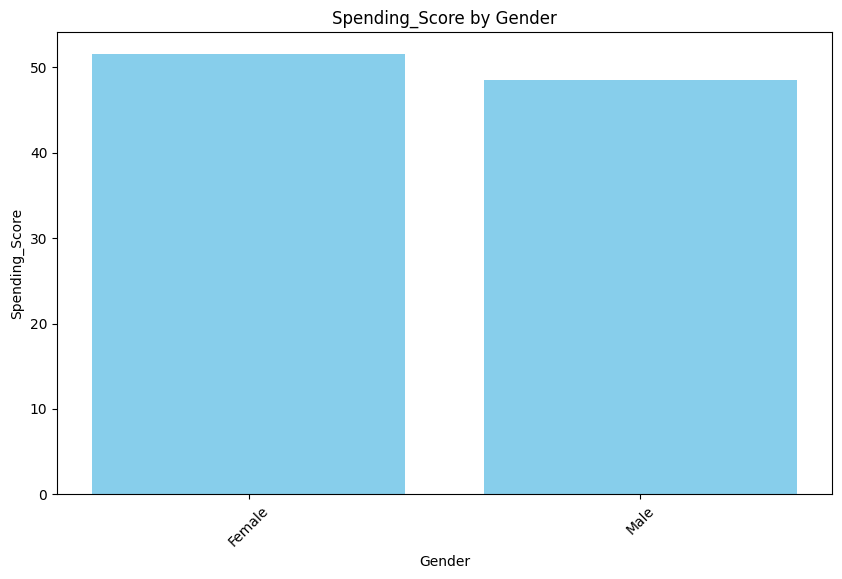

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Gender')['Spending_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Gender'], grouped_data['Spending_Score'], color='skyblue')
plt.title("Spending_Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending_Score")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


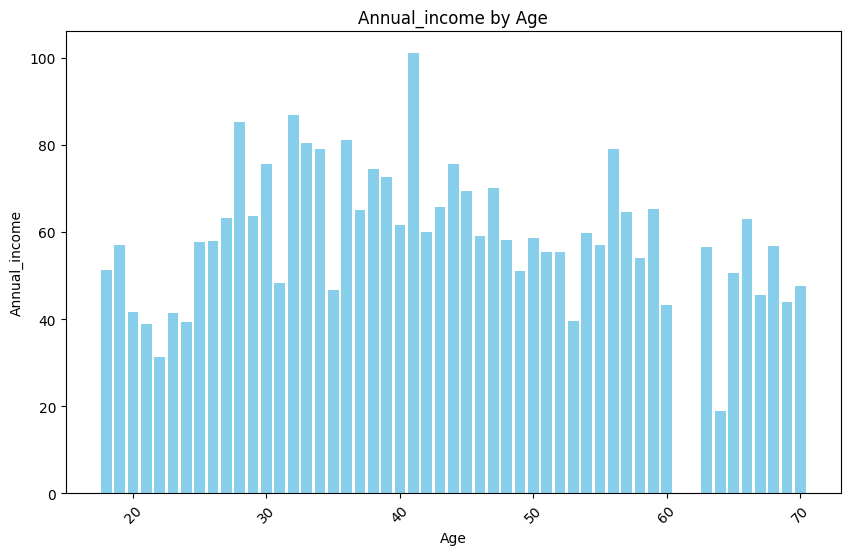

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Age')['Annual_income'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Age'], grouped_data['Annual_income'], color='skyblue')
plt.title("Annual_income by Age")
plt.xlabel("Age")
plt.ylabel("Annual_income")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


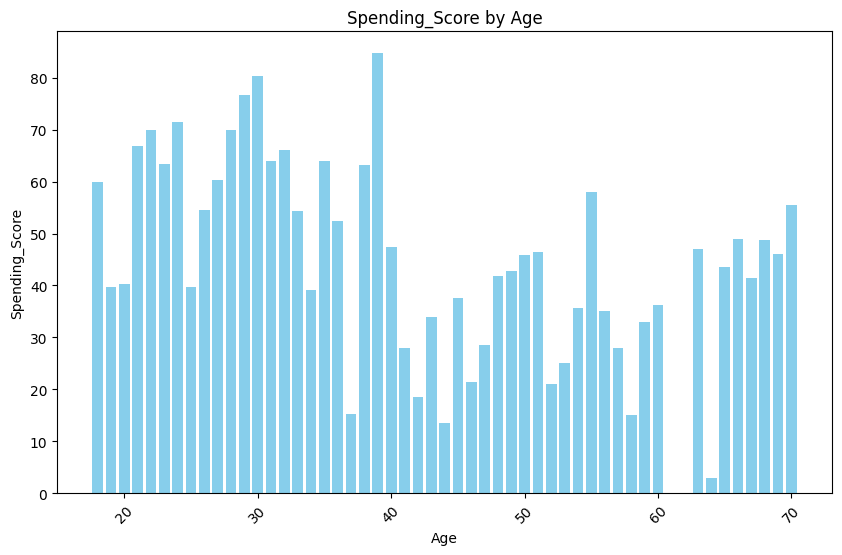

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Age')['Spending_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Age'], grouped_data['Spending_Score'], color='skyblue')
plt.title("Spending_Score by Age")
plt.xlabel("Age")
plt.ylabel("Spending_Score")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


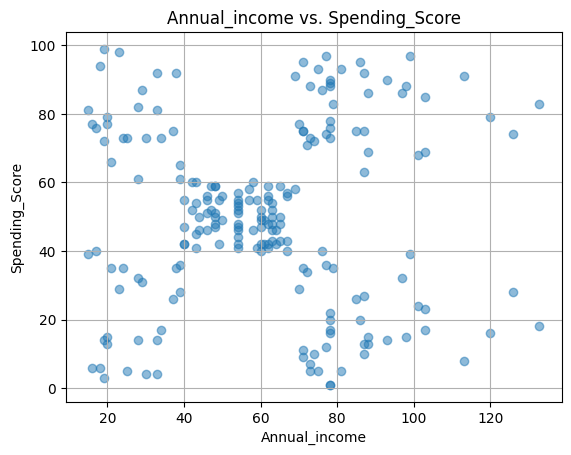

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Access columns directly to create the scatter plot
plt.scatter(data['Annual_income'], data['Spending_Score'], alpha=0.5)  # 'alpha' adjusts point transparency
plt.title("Annual_income vs. Spending_Score")
plt.xlabel("Annual_income")
plt.ylabel("Spending_Score")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


In [29]:
import pandas as pd

 

# Define a function to categorize age into groups
def categorize_age(age):
    if age < 26:
        return '18-25'
    elif 25 < age < 41:
        return '26-40'
    elif 40 < age < 56:
        return '41-55'
    elif age >= 55:
        return '55+'
    else:
        return 'Unknown'  # Handle cases where age is not in any of the specified ranges

# Apply the categorize_age function to create the 'AGE_GROUP' column
data['Age_group'] = data['Age'].apply(categorize_age)
del data['Age']

# Display the updated DataFrame
data


,Gender,Annual_income,Spending_Score,Age_group
0,Male,15.00,39,18-25
1,Male,15.00,81,18-25
2,Female,16.00,6,18-25
3,Female,16.00,77,18-25
4,Female,17.00,40,26-40
...,...,...,...,...
195,Female,120.00,79,26-40
196,Female,126.00,28,41-55
197,Male,126.00,74,26-40
198,Male,132.75,18,26-40


In [30]:
data

,Gender,Annual_income,Spending_Score,Age_group
0,Male,15.00,39,18-25
1,Male,15.00,81,18-25
2,Female,16.00,6,18-25
3,Female,16.00,77,18-25
4,Female,17.00,40,26-40
...,...,...,...,...
195,Female,120.00,79,26-40
196,Female,126.00,28,41-55
197,Male,126.00,74,26-40
198,Male,132.75,18,26-40


# Spending Score (1-100) Column

In [31]:
data['Spending_Score']

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending_Score, Length: 200, dtype: int64

In [32]:
data['Spending_Score'].min()


1

In [33]:
data['Spending_Score'].max()

99

In [34]:
import pandas as pd


# Define a function to categorize spending scores
def categorize_score(score):
    if score < 11:
        return '01-10'
    elif 10 < score < 31:
        return '11-30'
    elif 30 < score < 61:
        return '31-60'
    elif 60 < score < 81:
        return '61-80'
    elif score > 80:
        return '81+'
    else:
        return '0'

# Apply the function to create the 'Score_Range' column
data['Score_Range'] = data['Spending_Score'].apply(categorize_score)

# Delete the 'Spending Score (1-100)' column
data.drop('Spending_Score', axis=1, inplace=True)

data


,Gender,Annual_income,Age_group,Score_Range
0,Male,15.00,18-25,31-60
1,Male,15.00,18-25,81+
2,Female,16.00,18-25,01-10
3,Female,16.00,18-25,61-80
4,Female,17.00,26-40,31-60
...,...,...,...,...
195,Female,120.00,26-40,61-80
196,Female,126.00,41-55,11-30
197,Male,126.00,26-40,61-80
198,Male,132.75,26-40,11-30


# Analyze age vs annual icome

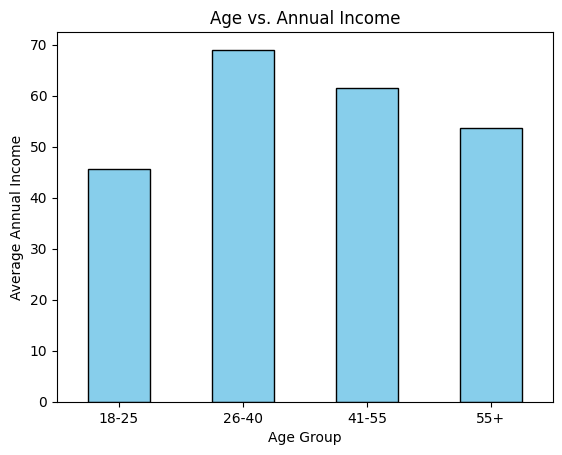

In [35]:
age_income = data.groupby('Age_group')['Annual_income'].mean()

# Plot the bar chart
age_income.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age vs. Annual Income')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Analyze Gender vs annual income

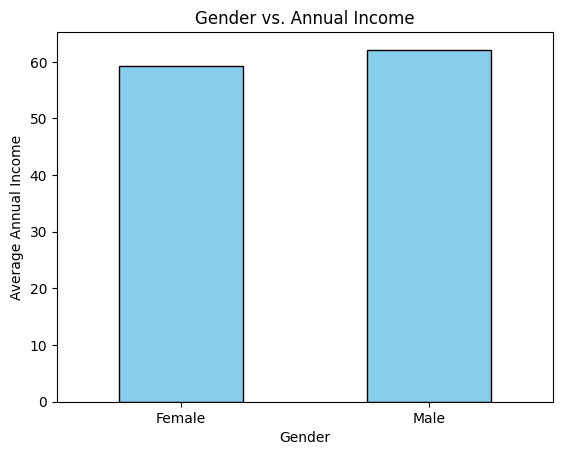

In [36]:
age_income = data.groupby('Gender')['Annual_income'].mean()

# Plot the bar chart
age_income.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender vs. Annual Income')
plt.xlabel('Gender')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

<Axes: xlabel='Age_group', ylabel='count'>

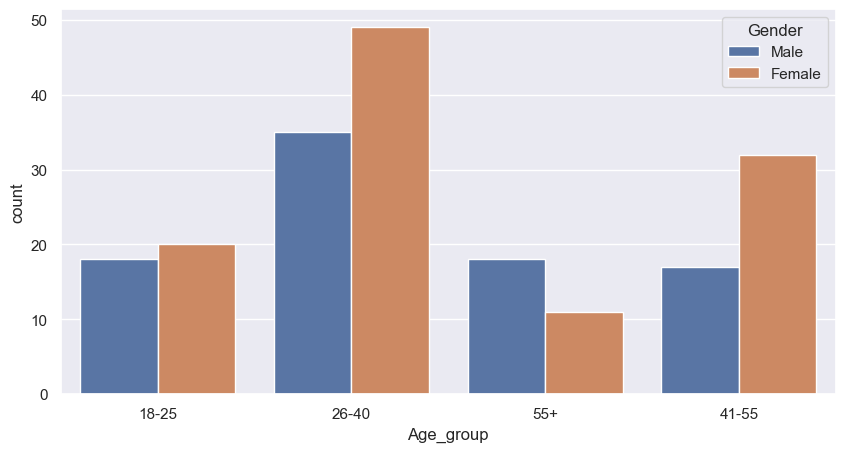

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=data['Age_group'],hue=data['Gender'])

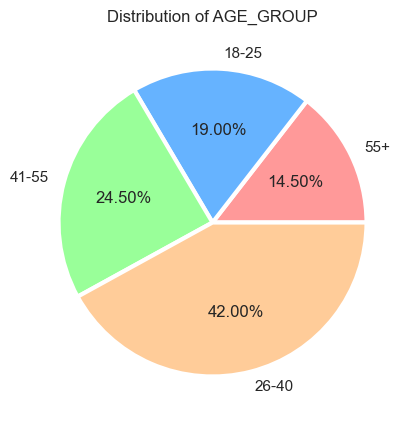

In [38]:
# Group the data by 'AGE_GROUP', count the occurrences, and sort by size
age_group_counts = data['Age_group'].value_counts().sort_values()

# Create a pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(age_group_counts, labels=age_group_counts.index, colors=colors, autopct='%1.2f%%', wedgeprops={'linewidth': 3, 'antialiased': True})

# Add a title
plt.title('Distribution of AGE_GROUP')

# Show the pie chart
plt.show()

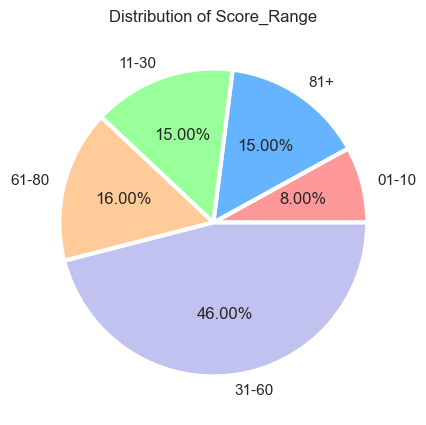

In [39]:
# Group the data by 'AGE_GROUP', count the occurrences, and sort by size
age_group_counts = data['Score_Range'].value_counts().sort_values()

# Create a pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(age_group_counts, labels=age_group_counts.index, colors=colors, autopct='%1.2f%%', wedgeprops={'linewidth': 3, 'antialiased': True})

# Add a title
plt.title('Distribution of Score_Range')

# Show the pie chart
plt.show()

Age-Group lie in 31-60 highest Score Range
Age-group 26-40 lie in all Score_range
Age -group 55+ mainly Score_range lie between 31-60


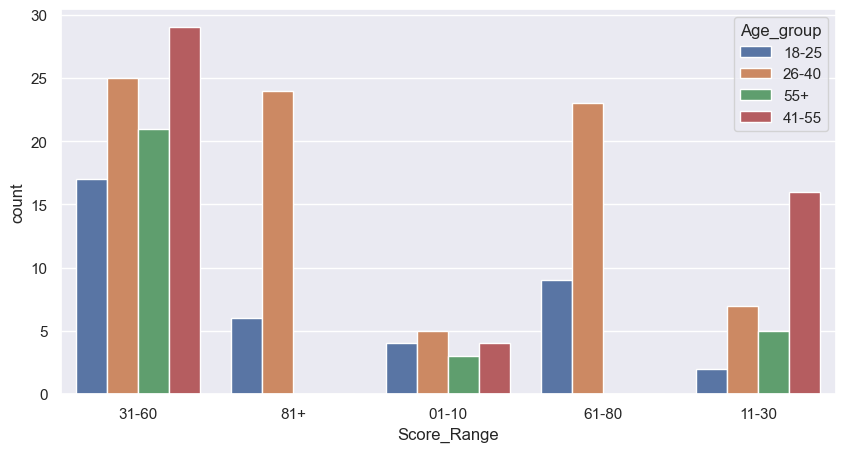

In [40]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=data['Score_Range'],hue=data['Age_group'])

print('Age-Group lie in 31-60 highest Score Range')
print('Age-group 26-40 lie in all Score_range')
print('Age -group 55+ mainly Score_range lie between 31-60')

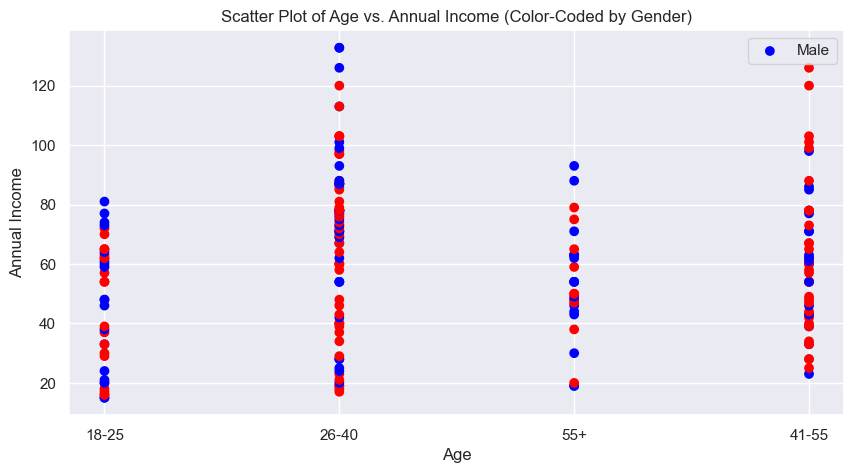

In [41]:
# Create a scatter plot with color-coding by gender
plt.scatter(data['Age_group'], data['Annual_income'], c=data['Gender'].map({'Male': 'blue', 'Female': 'red'}))

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter Plot of Age vs. Annual Income (Color-Coded by Gender)')
plt.legend(['Male', 'Female'])

plt.show()
